In [9]:
import math
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import itertools

from ema_workbench import save_results, load_results
from ema_workbench.analysis import parcoords
from ema_workbench.analysis import clusterer, plotting, Density

#%matplotlib inline
clr_palette = ([sns.color_palette("YlGn", 15)[10],sns.cubehelix_palette(8)[6]])

pydice_folder = os.path.dirname(os.getcwd()) + '\\1_Model'
sys.path.append(pydice_folder)

from ema_workbench import (perform_experiments, Model, Policy, Scenario, ReplicatorModel, RealParameter, IntegerParameter, ScalarOutcome, ArrayOutcome, 
                           Constant, ema_logging, SequentialEvaluator, MultiprocessingEvaluator, IpyparallelEvaluator)

from PyRICE_V8 import PyRICE

from matplotlib import pyplot

## Get most recent results from CSVs

In [10]:
results_total_short_term = pd.read_csv("experiments_short_term_uncertainty_total.csv")

results_total_short_term['Economic scenario'] = ""#df.loc[df['c1'] == 'Value', 'c2'] = 10
results_total_short_term.loc[results_total_short_term["scenario_pop_gdp"] == 0,'Economic scenario'] = "Nordhaus ref scenario"
results_total_short_term.loc[results_total_short_term["scenario_pop_gdp"] == 1,'Economic scenario'] = "SSP1"
results_total_short_term.loc[results_total_short_term["scenario_pop_gdp"] == 2,'Economic scenario'] = "SSP2"
results_total_short_term.loc[results_total_short_term["scenario_pop_gdp"] == 3,'Economic scenario'] = "SSP3"
results_total_short_term.loc[results_total_short_term["scenario_pop_gdp"] == 4,'Economic scenario'] = "SSP4"
results_total_short_term.loc[results_total_short_term["scenario_pop_gdp"] == 5,'Economic scenario'] = "SSP5"

In [11]:
results_total_short_term = results_total_short_term.rename(columns={'principle': 'Principle'})

# Utilitarian objective analysis

In [12]:
rc1 = {'font.size': 20,
     'axes.labelsize': 25,
     'axes.titlesize': 27,
     'xtick.labelsize': 26,
     'ytick.labelsize': 26,
     'legend.fontsize': 22,
     'axes.linewidth': 1.25,
     'grid.linewidth': 1.0,
     'lines.linewidth': 1.5,
     'lines.markersize': 6.0,
     'patch.linewidth': 1.0,
     'xtick.major.width': 1.25,
     'ytick.major.width': 1.25,
     'xtick.minor.width': 1.0,
     'ytick.minor.width': 1.0,
     'xtick.major.size': 6.0,
     'ytick.major.size': 6.0,
     'xtick.minor.size': 4.0,
     'ytick.minor.size': 4.0,
     'legend.title_fontsize': 21}

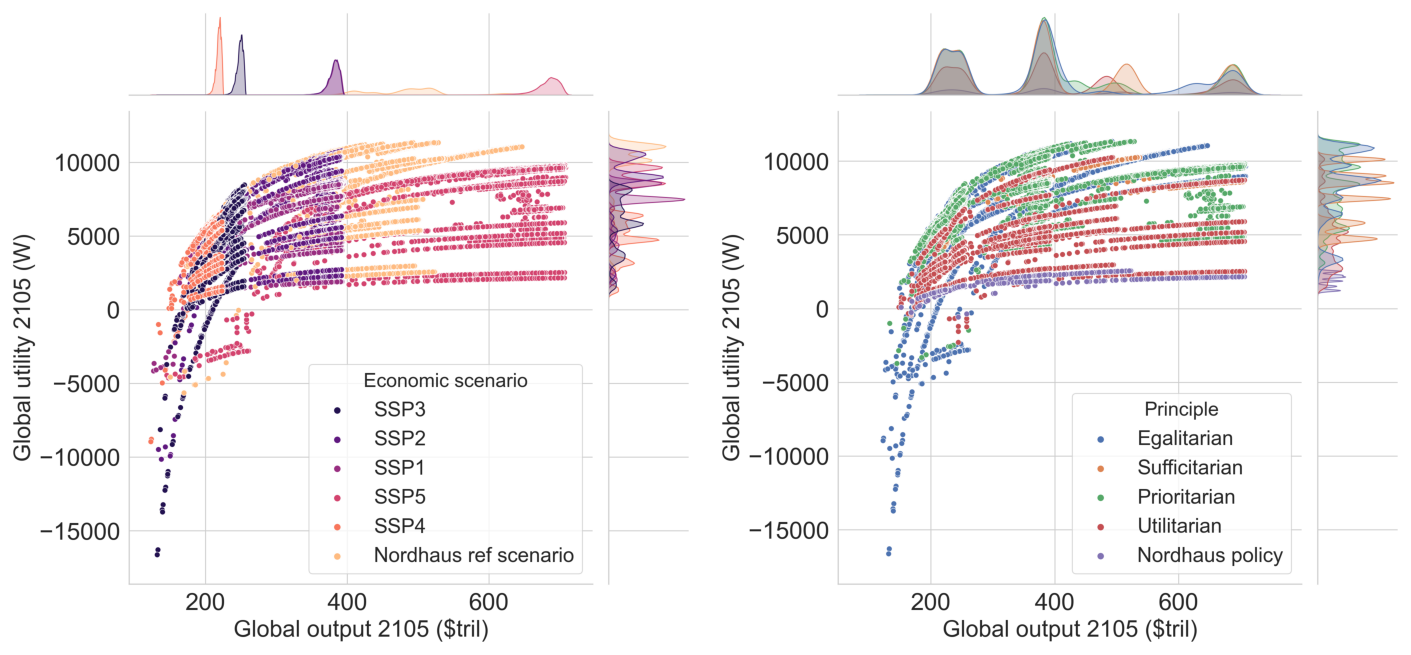

In [30]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc=rc1)
sns.set_style("whitegrid")

#joint plot 1
g1 = sns.jointplot(height = 10,data=results_total_short_term, x='Total Output 2105', y="Utility 2105", 
                     hue="Economic scenario",palette='magma')

g1.set_axis_labels('Global output 2105 ($tril)', 'Global utility 2105 (W)')

#joint plot 2
g2 = sns.jointplot(height = 10,data=results_total_short_term, x='Total Output 2105', 
                   y="Utility 2105", hue="Principle")

g2.set_axis_labels('Global output 2105 ($tril)', 'Global utility 2105 (W)')

############### 2. SAVE PLOTS IN MEMORY TEMPORALLY
g1.savefig('g1.png',dpi = 200)
plt.close(g1.fig)

g2.savefig('g2.png',dpi = 200)
plt.close(g2.fig)

############### 3. CREATE YOUR SUBPLOTS FROM TEMPORAL IMAGES
f, axarr = plt.subplots(1, 2, figsize=(20, 10))

axarr[0].imshow(mpimg.imread('g1.png'))
axarr[1].imshow(mpimg.imread('g2.png'))

# turn off x and y axis
[ax.set_axis_off() for ax in axarr.ravel()]

plt.tight_layout()
plt.show()

f.savefig("dualjointplot_short_term_uncertainty_utilitarian_objectives.png", dpi=200)

# Egalitarian objective analysis - distribution plots

C:\Users\ivart\anaconda3\lib\site-packages\seaborn\axisgrid.py:1774: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.fig.savefig(*args, **kwargs)
C:\Users\ivart\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


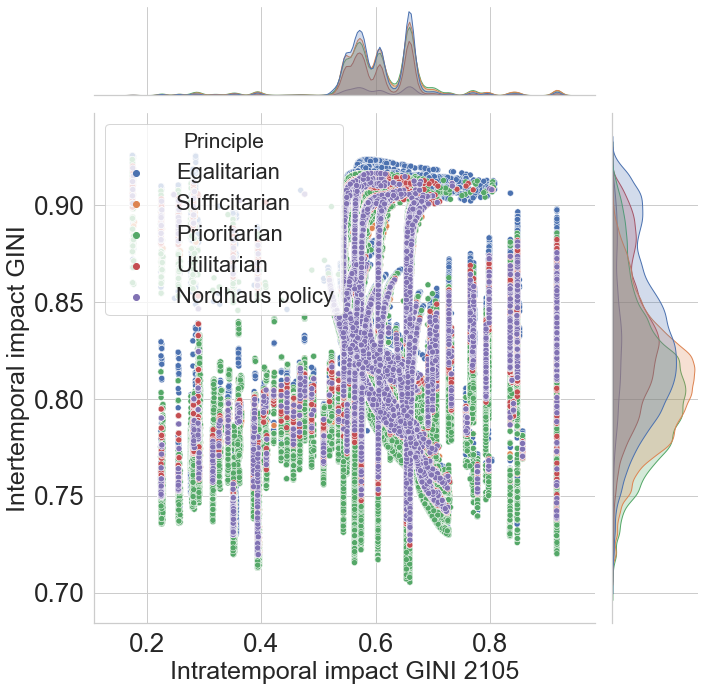

In [33]:
sns.set(rc=rc1)
sns.set_style("whitegrid")

plot = sns.jointplot(height = 10,data=results_total_short_term, x='Intratemporal impact GINI 2105', y="Intertemporal impact GINI", hue="Principle")

#plot.fig.suptitle("Distribution of impact inequality between and within generations",fontsize = "medium")
#plot.fig.subplots_adjust(top=0.95) # Reduce plot to make room 

plot.savefig('Distribution of impact inequality between and within generations.png',dpi = 200)


C:\Users\ivart\anaconda3\lib\site-packages\seaborn\axisgrid.py:1774: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.fig.savefig(*args, **kwargs)


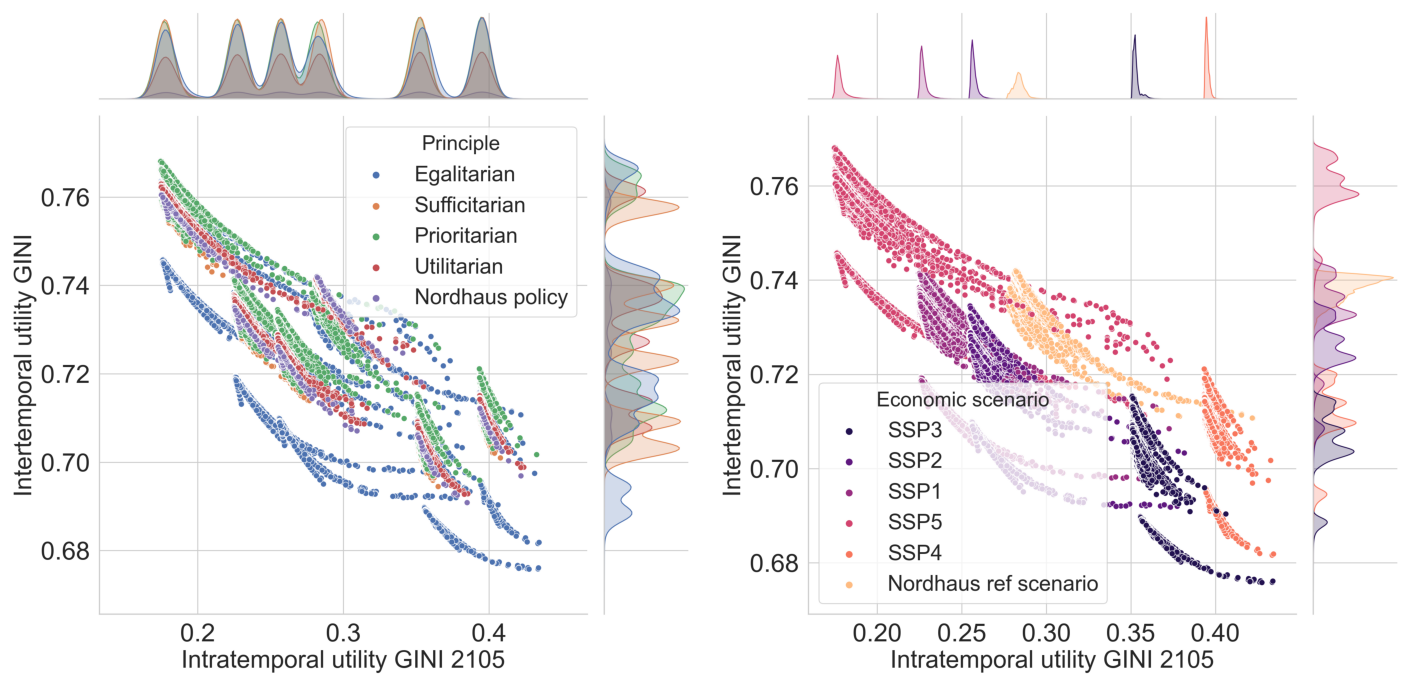

In [34]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc=rc1)
sns.set_style("whitegrid")

#joint plot 1
g1 = sns.jointplot(height = 10,data=results_total_short_term, 
                   x='Intratemporal utility GINI 2105', y="Intertemporal utility GINI", hue="Principle")

#joint plot 2
g2 = sns.jointplot(height = 10,data=results_total_short_term, x='Intratemporal utility GINI 2105', 
                   y="Intertemporal utility GINI", hue="Economic scenario",palette = 'magma')

############### 2. SAVE PLOTS IN MEMORY TEMPORALLY
g1.savefig('g1.png',dpi = 200)
plt.close(g1.fig)

g2.savefig('g2.png',dpi = 200)
plt.close(g2.fig)

############### 3. CREATE YOUR SUBPLOTS FROM TEMPORAL IMAGES
f, axarr = plt.subplots(1, 2, figsize=(20, 10))

axarr[0].imshow(mpimg.imread('g1.png'))
axarr[1].imshow(mpimg.imread('g2.png'))

# turn off x and y axis
[ax.set_axis_off() for ax in axarr.ravel()]

plt.tight_layout()
plt.show()

f.savefig("dualjointplot_short_term_uncertainty_egalitarian_objectives.png", dpi=200)

In [35]:
#g = sns.relplot(data=results_total_short_term,x='Highest climate impact per capita 2105', 
#                y="Atmospheric Temperature 2105",hue="principle", size="Intertemporal impact GINI",
#                col = "Economic scenario",col_wrap=2)
#g.set(xscale="log", yscale="log")
#g.despine(left=True, bottom=True)

# Sufficitarian objective analysis - distribution plots

In [16]:
results_total_short_term['Distance to treshold 2105_recoded'] = results_total_short_term["Distance to treshold 2105"]
results_total_short_term.loc[results_total_short_term["Distance to treshold 2105"] > 5,'Distance to treshold 2105_recoded'] = 5

C:\Users\ivart\anaconda3\lib\site-packages\seaborn\axisgrid.py:1774: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.fig.savefig(*args, **kwargs)
C:\Users\ivart\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


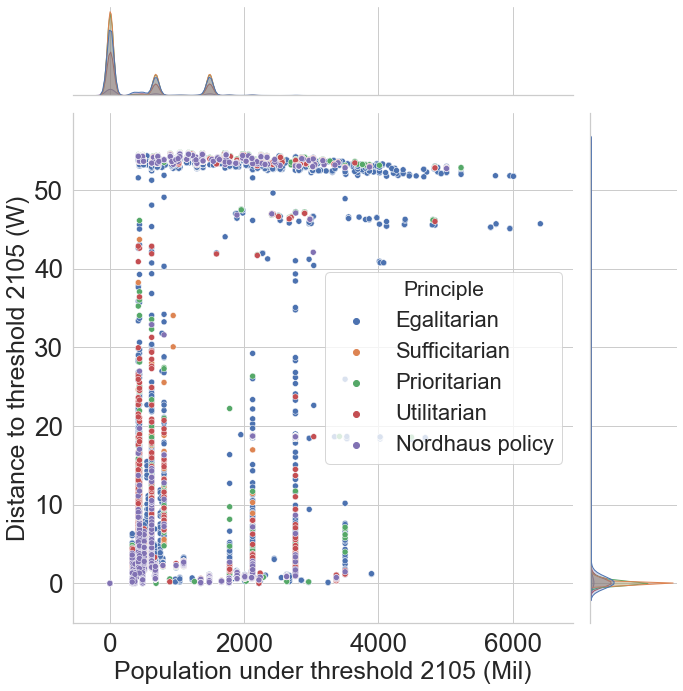

In [21]:
sns.set(rc=rc1)
sns.set_style("whitegrid")

plot = sns.jointplot(height = 10,data=results_total_short_term, x='Population under treshold 2105', y='Distance to treshold 2105', hue="Principle")
#plot.set(ylabel='Distance to threshold 2105 (W)', xlabel='Population under threshold 2105 (Mil)')
plot.set_axis_labels('Population under threshold 2105 (Mil)', 'Distance to threshold 2105 (W)')

#plot.fig.suptitle("Distribution of distance to and population under treshold")
#plot.fig.subplots_adjust(top=0.95) # Reduce plot to make room 

plot.savefig('Distribution of distance to and population under treshold.png',dpi = 200)


In [38]:
#sns.set(font_scale=1.35)  # crazy big
#sns.set_style("whitegrid")

#a4_dims = (13,6)
#fig, ax = pyplot.subplots(figsize=a4_dims)
#ax = sns.violinplot(ax=ax,x="principle", y='Distance to treshold 2105', hue="Economic scenario",
#                    data=results_total_short_term, palette="Set2",bw = 0.2,  cut=2)

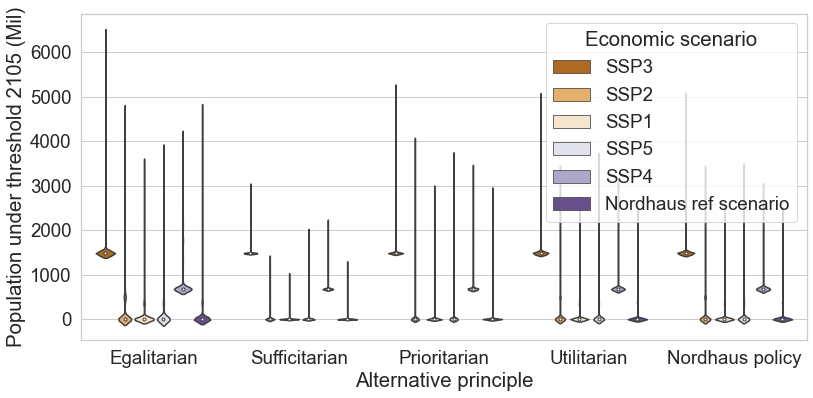

In [19]:
sns.set(font_scale=1.7)  # crazy big
sns.set_style("whitegrid")

a4_dims = (13,6)
fig, ax = pyplot.subplots(figsize=a4_dims)
plot = sns.violinplot(ax=ax,x="Principle", y='Population under treshold 2105', hue="Economic scenario",
                    data=results_total_short_term, palette="PuOr",bw = 0.2,  cut=2)
plot.set(xlabel='Alternative principle', ylabel='Population under threshold 2105 (Mil)')

fig.savefig("voilin_plot_population_under_treshold.png", dpi=200)

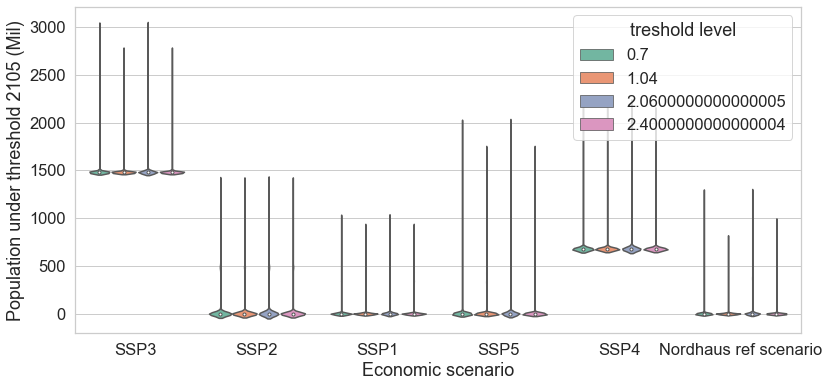

In [20]:
sns.set(font_scale=1.5)  # crazy big
sns.set_style("whitegrid")

a4_dims = (13,6)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(ax=ax,x="Economic scenario", y='Population under treshold 2105', hue="treshold level",
                    data=results_total_short_term, palette="Set2",bw = 0.2,  cut=2)
ax.set(ylabel='Population under threshold 2105 (Mil)')

fig.savefig("voilin_plot_threshold_level.png", dpi=200)

# Prioritarian objective analysis - distribution plots

C:\Users\ivart\anaconda3\lib\site-packages\seaborn\axisgrid.py:1774: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.fig.savefig(*args, **kwargs)


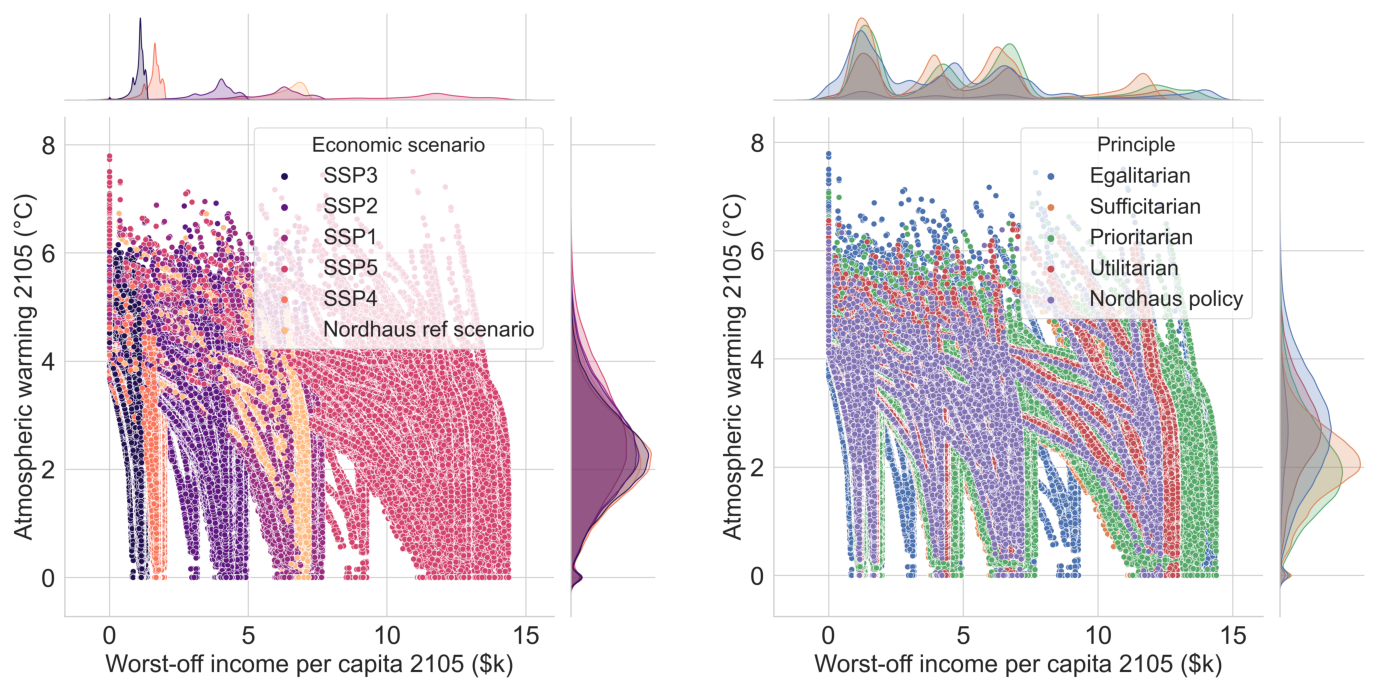

In [22]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc=rc1)
sns.set_style("whitegrid")

#joint plot 1
g1 = sns.jointplot(height = 10,data=results_total_short_term, x='Lowest income per capita 2105', 
                   y="Atmospheric Temperature 2105", hue="Economic scenario", palette ='magma' )
g1.set_axis_labels('Worst-off income per capita 2105 ($k)', 'Atmospheric warming 2105 (°C)')

#joint plot 2
g2 = sns.jointplot(height = 10,data=results_total_short_term, x='Lowest income per capita 2105', 
                   y="Atmospheric Temperature 2105", hue="Principle")
g2.set_axis_labels('Worst-off income per capita 2105 ($k)', 'Atmospheric warming 2105 (°C)')


############### 2. SAVE PLOTS IN MEMORY TEMPORALLY
g1.savefig('g1.png',dpi = 200)
plt.close(g1.fig)

g2.savefig('g2.png',dpi = 200)
plt.close(g2.fig)

############### 3. CREATE YOUR SUBPLOTS FROM TEMPORAL IMAGES
f, axarr = plt.subplots(1, 2, figsize=(20, 10))

axarr[0].imshow(mpimg.imread('g1.png'))
axarr[1].imshow(mpimg.imread('g2.png'))

# turn off x and y axis
[ax.set_axis_off() for ax in axarr.ravel()]

plt.tight_layout()
plt.show()

f.savefig("dualjointplot_short_term_uncertainty_prioritarian_objectives.png", dpi=200)

C:\Users\ivart\anaconda3\lib\site-packages\seaborn\axisgrid.py:1774: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.fig.savefig(*args, **kwargs)


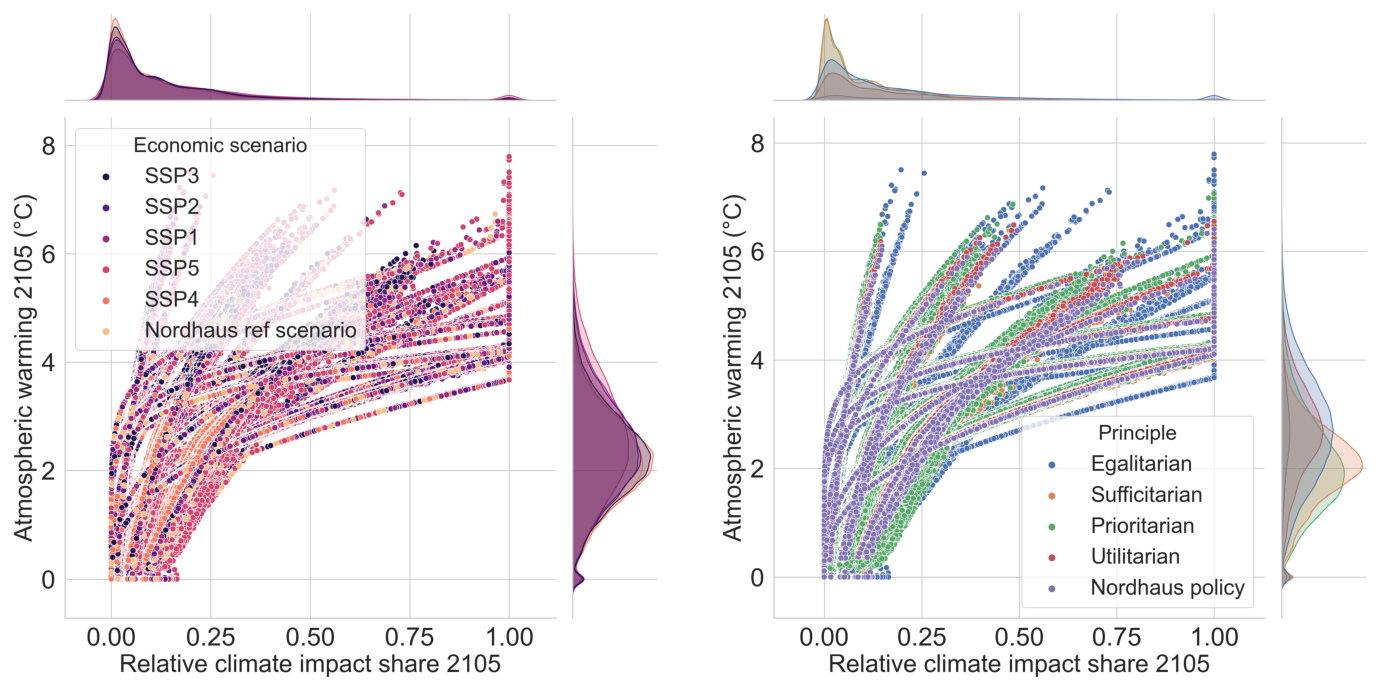

In [23]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc=rc1)
sns.set_style("whitegrid")

#joint plot 1
g1 = sns.jointplot(height = 10,data=results_total_short_term, x='Highest climate impact per capita 2105', 
                   y="Atmospheric Temperature 2105", hue="Economic scenario", palette ='magma')

g1.set_axis_labels('Relative climate impact share 2105', 'Atmospheric warming 2105 (°C)')

#joint plot 2
g2 = sns.jointplot(height = 10,data=results_total_short_term, x='Highest climate impact per capita 2105', 
                   y="Atmospheric Temperature 2105", hue="Principle")

g2.set_axis_labels('Relative climate impact share 2105', 'Atmospheric warming 2105 (°C)')

############### 2. SAVE PLOTS IN MEMORY TEMPORALLY
g1.savefig('g1.png',dpi = 200)
plt.close(g1.fig)

g2.savefig('g2.png',dpi = 200)
plt.close(g2.fig)

############### 3. CREATE YOUR SUBPLOTS FROM TEMPORAL IMAGES
f, axarr = plt.subplots(1, 2, figsize=(20, 10))

axarr[0].imshow(mpimg.imread('g1.png'))
axarr[1].imshow(mpimg.imread('g2.png'))

# turn off x and y axis
[ax.set_axis_off() for ax in axarr.ravel()]

plt.tight_layout()
plt.show()

f.savefig("dualjointplot_short_term_uncertainty_prioritarian_objectives_relative_climate_impact.png", dpi=200)

In [24]:
s = results_total_short_term['Highest climate impact per capita 2105']
recoded = s.clip(lower = None, upper = 1)
results_total_short_term['relative climate impact 2105 recoded'] = recoded

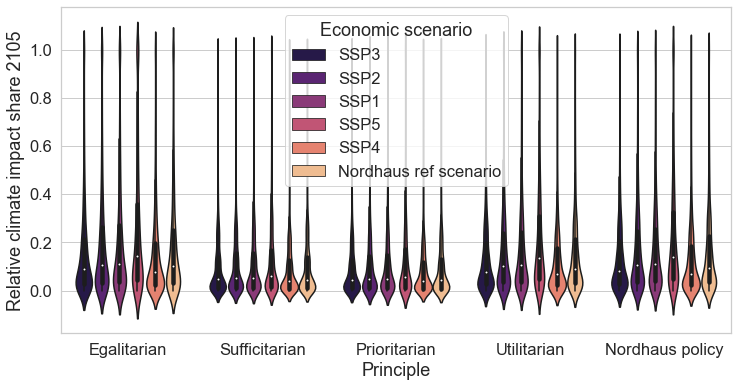

In [25]:
sns.set(font_scale=1.5)  # crazy big
sns.set_style("whitegrid")

a4_dims = (12,6)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(ax=ax,x="Principle", y='relative climate impact 2105 recoded', hue="Economic scenario",
                    data=results_total_short_term, palette="magma",bw = 0.2,  cut=2)
ax.set(ylabel='Relative climate impact share 2105')

fig.savefig("voilin_plot_relative_climate_economic-scenario.png", dpi=200)

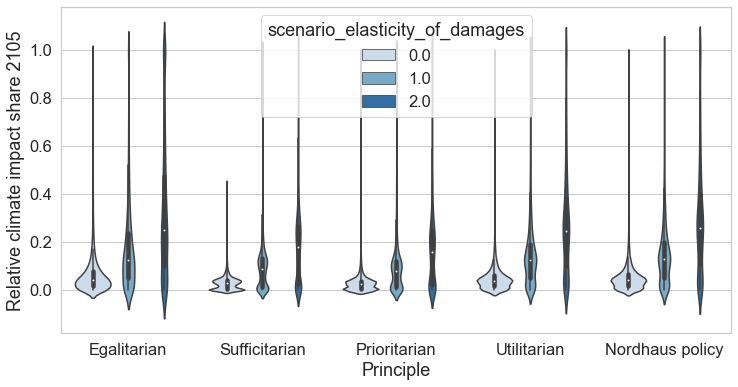

In [26]:
sns.set(font_scale=1.5)  # crazy big
sns.set_style("whitegrid")

a4_dims = (12,6)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(ax=ax,x="Principle", y='relative climate impact 2105 recoded', hue="scenario_elasticity_of_damages",
                    data=results_total_short_term, palette="Blues",bw = 0.2,  cut=2)
ax.set(ylabel='Relative climate impact share 2105')

fig.savefig("voilin_plot_relative_climate_elasticity_of_damages.png", dpi=200)

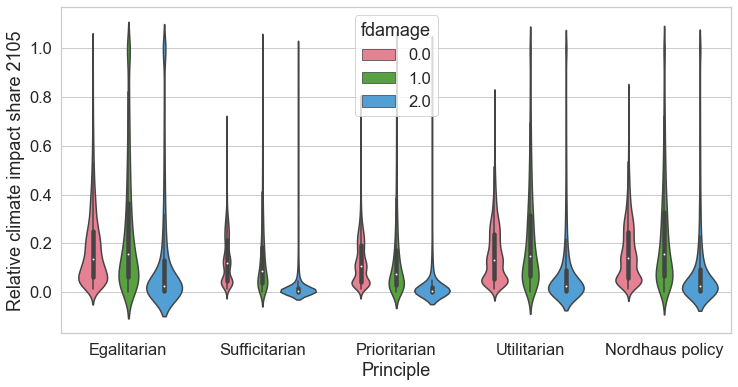

In [27]:
sns.set(font_scale=1.5)  # crazy big
sns.set_style("whitegrid")

a4_dims = (12,6)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(ax=ax,x="Principle", y='relative climate impact 2105 recoded', hue="fdamage",
                    data=results_total_short_term, palette="husl",bw = 0.2,  cut=2)
ax.set(ylabel='Relative climate impact share 2105')

fig.savefig("voilin_plot_relative_climate_fmdamage.png", dpi=200)

In [32]:
data = results_total_short_term[["Lowest income per capita 2105","Economic scenario","scenario_elasticity_of_damages"]]

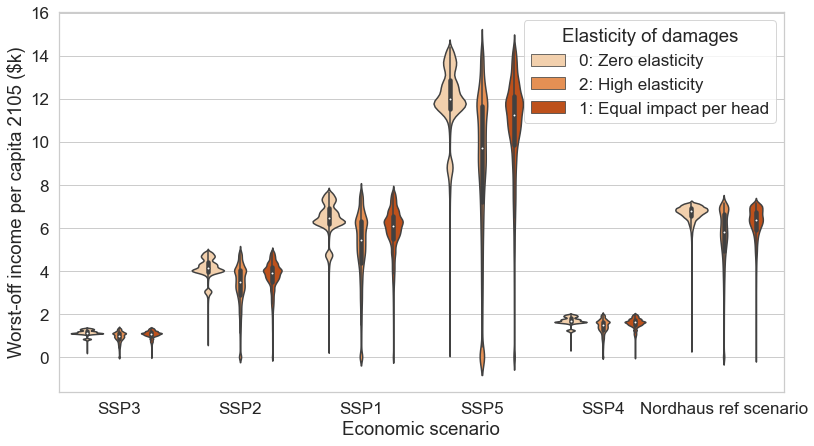

In [36]:
sns.set(font_scale=1.55)  # crazy 
sns.set_style("whitegrid")

a4_dims = (13,7)
fig, ax = pyplot.subplots(figsize=a4_dims)

data = results_total_short_term[["Lowest income per capita 2105","Economic scenario","scenario_elasticity_of_damages"]]
data.columns = ["Worst-off income per capita 2105 ($k)","Economic scenario","Elasticity of damages"]

mapping = {0:"0: Zero elasticity",1: "1: Equal impact per head",2:"2: High elasticity"}
data = data.replace({"Elasticity of damages": mapping})


ax = sns.violinplot(ax=ax,x="Economic scenario", y='Worst-off income per capita 2105 ($k)', hue="Elasticity of damages",
                    data=data, palette="Oranges")

fig.savefig("voilin_plot_elasticity_of_damages.png", dpi=200)

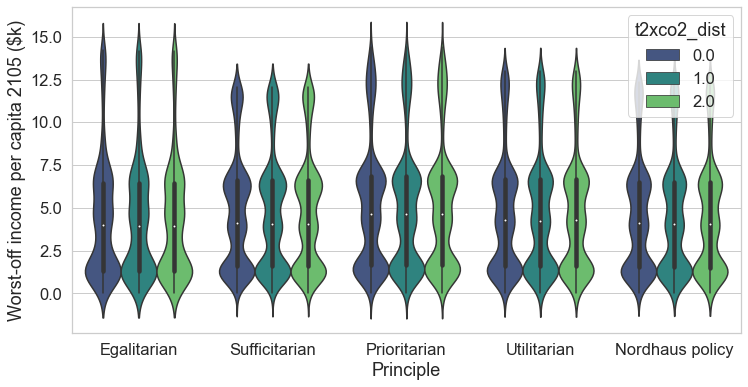

In [29]:
sns.set(font_scale=1.5)  # crazy big
sns.set_style("whitegrid")

a4_dims = (12,6)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(ax=ax,x="Principle", y="Lowest income per capita 2105", hue="t2xco2_dist",
                    data=results_total_short_term, palette="viridis",bw = 0.2,  cut=2)
ax.set(ylabel='Worst-off income per capita 2105 ($k)')

fig.savefig("voilin_plot_worst_off_income_t2xco2_dist.png", dpi=200)